# News Source Comparison

In [1]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import re


#color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
#sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
pd.set_option('display.max_colwidth', -1)
table_styles = [{'selector': 'td',
                 'props': [('min-width', '100px'), ('text-align', 'center')]},
                {'selector': 'tr',
                 'props': [('border-bottom', '1px dotted black')]},
                {'selector': 'th',
                 'props': [('text-align', 'center')]}
               ]

%matplotlib inline

directory = "url_top_lists/"
stream = "comparison"

/home/pflugmacher/.local/lib/python3.4/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
conn = None
try:
    # read connection parameters
    paramsS17 = config.cfgAzureS17()
    paramsS03 = config.cfgAzureS03()

    paramsF17 = config.cfgAzureF17()
    paramsF03 = config.cfgAzureF03()
    
    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    connS17 = psycopg2.connect(**paramsS17)
    connS03 = psycopg2.connect(**paramsS03)
    
    connF17 = psycopg2.connect(**paramsF17)
    connF03 = psycopg2.connect(**paramsF03)

    # create a cursor
    curS17 = connS17.cursor()
    curS03 = connS03.cursor()
    
    curF17 = connF17.cursor()
    curF03 = connF03.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    
    curS17.execute('SELECT version()')
    curS03.execute('SELECT version()')
    curF17.execute('SELECT version()')
    curF03.execute('SELECT version()')
    
    # display the PostgreSQL database server version
    db_version_curS17 = curS17.fetchone()
    db_version_curS03 = curS03.fetchone()
    db_version_curF17 = curF17.fetchone()
    db_version_curF03 = curF03.fetchone()
    
    print(db_version_curS17)
    print(db_version_curS03)
    print(db_version_curF17)
    print(db_version_curF03)

    # close the communication with the PostgreSQL
    curS17.close()
    curS03.close()
    curF17.close()
    curF03.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)


## Query URLs

In [6]:
urlsS03 = pd.read_sql_query("SELECT * FROM tweets_urls;", connS03 )
print("# of URLs sampled 03: %s" %len(urlsS03))

urlsS17 = pd.read_sql_query("SELECT * FROM tweets_urls;", connS17 )
print("# of URLs sampled 17: %s" %len(urlsS17))

urlsS = urlsS17.append(urlsS03)
print("# of URLs sampled: %s" %len(urlsS))

urlsS.head()

# of URLs sampled 03: 40339
# of URLs sampled 17: 35687
# of URLs sampled: 76026


,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
0,989097603664138240,http://arte.tv/abgedreht,https://www.arte.tv/de/videos/RC-014033/abgedreht/,200,https://www.arte.tv/,arte.tv,False,False,True,False
1,988175933659021318,https://twitter.com/piersmorgan/status/987388203593322496,https://twitter.com/piersmorgan/status/987388203593322496,200,https://twitter.com/,twitter.com,True,False,True,False
2,988176164358361088,https://www.journal.koeln/pol-ham-fahrradfahrer-verletzt-sich-bei-sturz/,https://www.journal.koeln/pol-ham-fahrradfahrer-verletzt-sich-bei-sturz/,200,https://www.journal.koeln/,journal.koeln,False,False,True,False
3,988176403412766720,http://www.radionomy.com/erika1,https://www.radionomy.com/en/radio/erika1,200,https://www.radionomy.com/,radionomy.com,False,False,True,False
4,988176415995592704,https://twitter.com/JanLatten/status/988161845205913600,https://twitter.com/JanLatten/status/988161845205913600,200,https://twitter.com/,twitter.com,True,False,True,False


## Query Tweets

In [7]:
tweetsS03 = pd.read_sql_query("SELECT * FROM tweets_info;", connS03 )
print("# of Tweets sampled 03: %s" %len(tweetsS03))

tweetsS17 = pd.read_sql_query("SELECT * FROM tweets_info;", connS17 )
print("# of Tweets sampled 17: %s" %len(tweetsS17))

tweetsS = tweetsS17.append(tweetsS03)
print("# of Tweets sampled: %s" %len(tweetsS))

tweetsS.head()

# of Tweets sampled 03: 123680
# of Tweets sampled 17: 112003
# of Tweets sampled: 235683


,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
0,988175614908788736,1647758059,"Johangeorgenstadt 23:59 Nachtzeit/Trocken/Klar ,Temp: 14°C, Hum:66%, Wind:WSW 0-&gt;24kmh, Baro: 1012.80hPa, Regen: 0.00mm #wetter",Sun Apr 22 22:00:00 +0000 2018,"<a href=""http://saratoga-weather.org/scripts-TweetWX.php#TweetWX"" rel=""nofollow"">TweetWX</a>",de,False,False,NaN,False,...,0,False,False,wetter,None,0,False,None,NaN,NaN
1,988175619098861568,234778734,Beim nächsten Ton ist es 0 Uhr: ♩♩♩,Sun Apr 22 22:00:01 +0000 2018,"<a href=""http://www.rasputin.de/"" rel=""nofollow"">rasputin</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
2,988175627453952002,821834588158853120,[d] DiplIngMarkus Verbrauch gestern: 3.71 kWh Uptime: 41 days 21:01:04 since 23:48:32 13/10/2017,Sun Apr 22 22:00:03 +0000 2018,"<a href=""http://arduino-tweet.appspot.com/"" rel=""nofollow"">Arduino</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
3,988175627479146498,859148218915069952,Alien Mutterschiff sozusagen \n(Hab das Gefühl bin schwanger) \n(Das gibt dann rr Stress) https://t.co/z4uHz2dugO,Sun Apr 22 22:00:03 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
4,988175681996681218,3206249890,@MDegen55 🇩🇪🇩🇪 Gute Nacht 🌃🌃🌃 https://t.co/OTnsAsDGrc,Sun Apr 22 22:00:16 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,0,False,False,None,3206249890,0,False,None,NaN,NaN


## Query Images

In [9]:
imageS03 = pd.read_sql_query("SELECT * FROM tweets_media;", connS03 )
print("# of Images sampled 03: %s" %len(imageS03))

imageS17 = pd.read_sql_query("SELECT * FROM tweets_media;", connS17 )
print("# of Images sampled 17: %s" %len(imageS17))

imageS = imageS17.append(imageS03)
print("# of Images sampled: %s" %len(imageS))

imageS.head()

# of Images sampled 03: 31717
# of Images sampled 17: 29930
# of Images sampled: 61647


,tweet_id,media_url,type,response_code,hash,path,is_processed
0,989362619692802048,http://pbs.twimg.com/media/DbrsDTxX0AEtjlE.jpg,photo,200,89e6f3e8e673b7c7,PostgreSQL/media/89e6f3e8e673b7c7.JPEG,True
1,987388203593322496,http://pbs.twimg.com/media/DbPoUpuWAAEm4cX.jpg,photo,200,e0f0eaea57b1f8f0,PostgreSQL/media/e0f0eaea57b1f8f0.JPEG,True
2,988176193722769409,http://pbs.twimg.com/media/DbVn4W1XcAAXMph.jpg,photo,200,a1a4413170627673,PostgreSQL/media/a1a4413170627673.JPEG,True
3,988161845205913600,http://pbs.twimg.com/tweet_video_thumb/Dban1LCXkAEc3xu.jpg,animated_gif,200,9b1785b1cdcb11cc,PostgreSQL/media/9b1785b1cdcb11cc.JPEG,True
4,988033487948173312,http://pbs.twimg.com/media/DbYy99XW0AA7-ZW.jpg,photo,200,ccc42d39c5c53919,PostgreSQL/media/ccc42d39c5c53919.JPEG,True


## Query Cards

In [11]:
cardsS03 = pd.read_sql_query("SELECT * FROM tweets_icards where has_icard is true and response_code is not null;", connS03 )
print("# of cards sampled 03: %s" %len(cardsS03))

cardsS17 = pd.read_sql_query("SELECT * FROM tweets_icards where has_icard is true and response_code is not null;", connS17 )
print("# of cards sampled 17: %s" %len(cardsS17))

cardsS = cardsS17.append(cardsS03)
print("# of cards sampled: %s" %len(cardsS))

cardsS.head()

# of cards sampled 03: 17398
# of cards sampled 17: 18270
# of cards sampled: 35668


,tweet_id,url,title,text,domain,top_level_domain,response_code,img,hash,path,has_icard,is_processed
0,990660022764998656,http://www.faz.net/aktuell/politik/ausland/oesterreich-diskutiert-ueber-die-kaltschnaeuzigen-blauhelme-15566647.html?utm_content=buffer316f8&utm_medium=social&utm_source=twitter.com&utm_campaign=GEPC%253Ds30,Blauhelme beobachten Morde: Dieses Video schockiert Österreich,Sie hätten die „Hunde“ warnen sollen: Ein kurzer Clip zeigt einen Hinterhalt am Golan. Zwei österreichische Blauhelme kommentieren das Blutbad. Ihre Kaltschnäuzigkeit wirft eine Frage auf.,http://www.faz.net/,faz.net,200,https://pbs.twimg.com/card_img/990643871183966210/A5Hmhyd9?format=jpg&name=600x314,f927fe1a26e1387c,PostgreSQL/media/f927fe1a26e1387c.JPEG,True,True
1,988177477150347264,https://events.help.ch/eventinfo.cfm?key=2123648,Lesung: Alice Schwarzer,None,https://events.help.ch/,help.ch,200,None,None,None,True,True
2,990668998600806400,http://parstoday.com/de/news/iran-i39804-gerichtsprozess_gegen_is_terroristen_in_teheran,Gerichtsprozess gegen IS-Terroristen in Teheran,Teheran (ParsToday) - Das Revolutionsgericht in Teheran hat heute den Prozess gegen einen der festgenommenen IS-Terroristen eröffnet.,http://parstoday.com/,parstoday.com,200,https://pbs.twimg.com/card_img/993227756526866433/g9rY5Hk-?format=jpg&name=600x314,d49dc8eacacc9484,PostgreSQL/media/d49dc8eacacc9484.JPEG,True,True
3,990700770440998914,https://www.youtube.com/watch?v=7eevhSWJZCE&feature=youtu.be,Obama HASST Deutsche !,Meinung in die Kommentare! Wer mich Unterstützen Möchte :) ! http://www.paypal.me/UnlustigTv Kanzlerakte: http://bit.ly/1OH1xmJ Die vier Siegermächte:http://...,https://www.youtube.com/,youtube.com,200,https://pbs.twimg.com/card_img/991806597625204736/mDDy1vBR?format=jpg&name=280x280,b331b171b333b333,PostgreSQL/media/b331b171b333b333.JPEG,True,True
4,983622981367812096,https://www.youtube.com/watch?v=yiWCGP4iKf4,geld verdienen - EINFACH ✅ (78+ Strategien die funktionieren!),Geld verdienen: https://12geldverdieneniminternet.com/online-geld-verdienen/ Auf meinem Blogartikel findet Ihr Infos zu den Quellen und Systemen! Lerne in di...,https://www.youtube.com/,youtube.com,200,https://pbs.twimg.com/card_img/992389430458667008/LqtcpsO4?format=jpg&name=280x280,f0e4e4c6dab6fc98,PostgreSQL/media/f0e4e4c6dab6fc98.JPEG,True,True


## Query Hashtags

In [12]:
hashtagsS03 = pd.read_sql_query("SELECT * FROM tweets_hashtags;", connS03 )
print("# of hashtags sampled 03: %s" %len(hashtagsS03))

hashtagsS17 = pd.read_sql_query("SELECT * FROM tweets_hashtags;", connS17 )
print("# of hashtags sampled 17: %s" %len(hashtagsS17))

hashtagsS = hashtagsS17.append(hashtagsS03)
print("# of hashtags sampled: %s" %len(hashtagsS))

hashtagsS.head()

# of hashtags sampled 03: 84203
# of hashtags sampled 17: 73935
# of hashtags sampled: 158138


,tweet_id,hashtag
0,988175614908788736,wetter
1,988176244029251584,MTVBRPETNUGGET
2,988176244029251584,MTVBRSHADETAYLORKATY
3,988176244029251584,PremiosMTVMiaw
4,988176244029251584,MTVLAINSTAGLCAMILAC


## Query Mentions

In [31]:
mentionsS03 = pd.read_sql_query("SELECT * FROM user_mentions;", connS03 )
print("# of mentions sampled 03: %s" %len(mentionsS03))

mentionsS17 = pd.read_sql_query("SELECT * FROM user_mentions;", connS17 )
print("# of mentions sampled 17: %s" %len(mentionsS17))

mentionsS = mentionsS17.append(mentionsS03)
print("# of mentions sampled: %s" %len(mentionsS))

mentionsS.head()

# of mentions sampled 03: 107522
# of mentions sampled 17: 100369
# of mentions sampled: 207891


,tweet_id,user_id,name,screen_name
0,988175681996681218,3206249890,Manfred Degen,MDegen55
1,988175711348363264,741626414072467457,vivi🤓,sesokitz
2,988175778474020868,10228272,YouTube,YouTube
3,988175933659021318,362144301,Brian Moore,brianmoore666
4,988176021726941185,760091686886371328,lil l,Payzn_


## Util Methods

In [85]:
def getcompareMediaOfDataframe(tweets, images, hashtags, mentions, cards, urls):
    selected_urls = urls[urls['tweet_id'].isin(tweets['id'].values)]
    selected_images = images[images['tweet_id'].isin(tweets['id'].values)]
    selected_cards = cards[cards['tweet_id'].isin(tweets['id'].values)]
    #selected_mentions = mentions[mentions['tweet_id'].isin(tweets['id'].values)]
    selected_mentions = tweets[tweets['user_mentions'].notnull()]
    selected_hashtags = hashtags[hashtags['tweet_id'].isin(tweets['id'].values)]
    selected_photo = selected_images[selected_images['type'] == 'photo']
    selected_gif = selected_images[selected_images['type'] == 'animated_gif']
    selected_video = selected_images[selected_images['type'] == 'video']
    
    just_text_tweets = tweets[   (~tweets['id'].isin(cards['tweet_id'].values)) & 
                                 (~tweets['id'].isin(selected_images['tweet_id'].values)) & 
                                 (~tweets['id'].isin(selected_hashtags['tweet_id'].values)) &
                                 (~tweets['id'].isin(selected_mentions['id'].values))]

    data = {'urls': [len(set(selected_urls['tweet_id'].values)) / len(tweets) * 100],
            'photos': [len(set(selected_photo['tweet_id'].values)) / len(tweets) * 100],
            'videos': [len(set(selected_video['tweet_id'].values)) / len(tweets) * 100],
            'animated gifs': [len(set(selected_gif['tweet_id'].values)) / len(tweets) * 100],
            'cards': [len(set(selected_cards['tweet_id'].values)) / len(tweets) * 100],
            'hashtags': [len(set(selected_hashtags['tweet_id'].values)) / len(tweets) * 100],
            'user mentions': [len(set(selected_mentions['id'].values)) / len(tweets) * 100],
            'text only': [len(set(just_text_tweets['id'].values)) / len(tweets) * 100]}
    
    return pd.DataFrame(data=data)

def getTweetVariation(df, is_retweet, is_quote, is_reply):
    return df[ (df['is_retweet'] == is_retweet) & (df['is_quote'] == is_quote) & (df['is_reply'] == is_reply)]
    
def getTweetsFromTLD(tweets, urls, top_level_domain):
    tld_urls = urls[urls['top_level_domain'] == top_level_domain ]
    return tweets[tweets['id'].isin(tld_urls['tweet_id'].values)]


## Sampled Data

### All Tweets by Media Usage

In [60]:
dataf = getcompareMediaOfDataframe(tweetsS, imageS, hashtagsS, mentionsS, cardsS, urlsS)
dataf

,animated gifs,cards,hashtags,photos,text only,urls,user mentions,videos
0,1.090448,15.13219,28.757696,17.95505,16.751314,30.90592,56.101628,2.492755


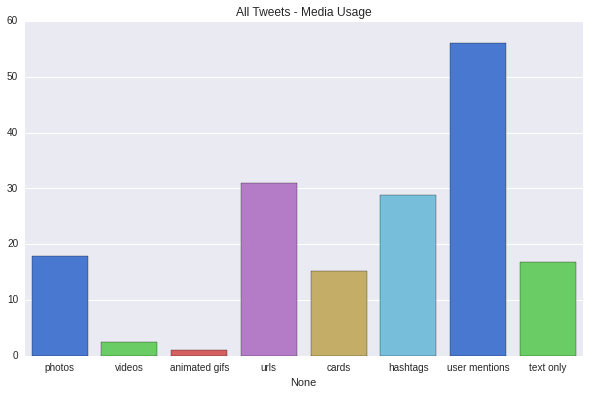

In [77]:
plt.figure(figsize=(10,6))
order = ['photos', 'videos', 'animated gifs', 'urls', 'cards', 'hashtags', 'user mentions', 'text only']
sns.color_palette(name='muted', desat=.75)
ax = sns.barplot(y=dataf.values[0], x=dataf.columns, palette='muted', x_order=order )

ax.set_title("All Tweets - Media Usage")
ax.set_

### Top 15 Media Sources

In [87]:
top20urls = urlsS['top_level_domain'].value_counts()[1:21]
top20urls

youtube.com        6223
facebook.com       1884
instagram.com      1532
welt.de            1222
spiegel.de         900
amazon.de          706
focus.de           668
twitch.tv          629
bild.de            594
faz.net            545
google.com         544
wordpress.com      525
sueddeutsche.de    464
zeit.de            448
presseportal.de    402
tagesschau.de      402
paper.li           352
tagesspiegel.de    335
heise.de           315
n-tv.de            285
dtype: int64

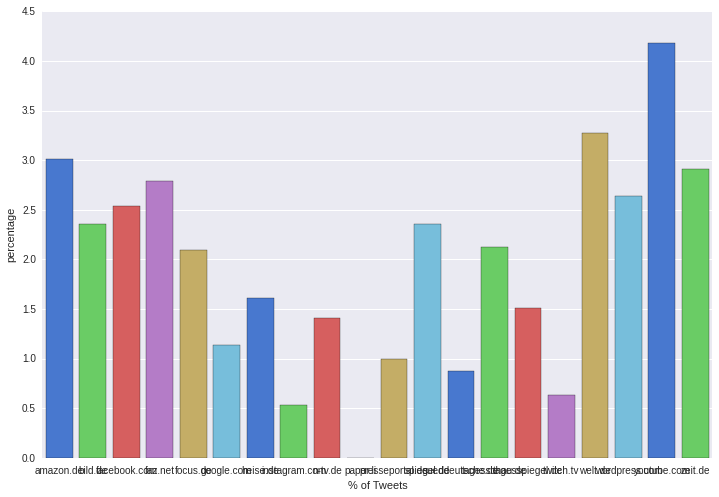

In [99]:
tld = []
percentages = []
for index, value in top20urls.iteritems():
    temp_tweets = getTweetsFromTLD(tweetsS, urlsS, index)
    tweets_variation = getTweetVariation(temp_tweets, False, False, True)
    
    tld.append(index)
    
    percentages.append(len(tweets_variation) / len(temp_tweets) * 100)

data = { 'percentage': percentages, 'Top Level Domain': tld}

comparison_tlds = pd.DataFrame(data=data)
plt.figure(figsize=(12,8))
ax = sns.barplot(x=comparison_tlds['Top Level Domain'], y=comparison_tlds['percentage'], palette='muted')
ax.set_xlabel("% of Tweets")
#ax.barh(bottom=5, width=5)